In [3]:
import numpy as np
import pandas as pd

In [38]:
num_homes = 0
o = {}
for case in range(1, 4):
    o[case] = {}
    for fold in range(5):
        o[case][fold] = pd.Series(np.load("../code/baseline/aug_data/test-error-{}-1-{}-{}.npy".format(fold, num_homes, case)).item()[2000]).mean()


In [32]:
pd.Series(np.load("../code/baseline/aug_data/test-error-0-1-0-0.npy").item()[2000]).mean()

35.52833591098833

In [36]:
pd.Series(np.load("../code/baseline/aug_data/test-error-0-1-20-1.npy").item()[2000]).mean()

48.101537370031856

In [34]:
pd.Series(np.load("../code/baseline/aug_data/test-error-0-1-0-2.npy").item()[2000]).mean()

46.854803251997694

In [26]:
pd.DataFrame(o)

,1,2,3
0,46.854803,46.854803,46.854803
1,73.374941,73.374941,73.374941
2,64.818934,64.818934,64.818934
3,74.164969,74.164969,74.164969
4,58.972942,58.972942,58.972942


In [27]:
q = np.load("../code/baseline/aug_data/test-error-{}-1-{}-{}.npy".format(fold, num_homes, case)).item()

In [122]:
fold_num = 4
dataset = 1

o = {}
order ='mw fridge hvac dw dr'
app1, app2, app3,app4,app5 = order.split()

for p in [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]:
    o[p] = np.load("../code/baseline/rnn-tree-order/valid-losses-0-1-GRU-50-1-True-0.1-2000-{}-[\'{}\', \'{}\', \'{}\', \'{}\', \'{}\'].npy".format(p, app1,app2, app3,app4,app5))
o['reduced'] = np.load("../code/baseline/rnn-tree-order/valid-losses-0-1-GRU-50-1-True-0.1-2000-1.0-[\'{}\', \'{}\', \'{}\', \'{}\', \'{}\']-reduced.npy".format(app1,app2, app3,app4,app5))

FileNotFoundError: [Errno 2] No such file or directory: "../code/baseline/rnn-tree-order/valid-losses-0-1-GRU-50-1-True-0.1-2000-0.0-['mw', 'fridge', 'hvac', 'dw', 'dr'].npy"

In [60]:
%matplotlib inline

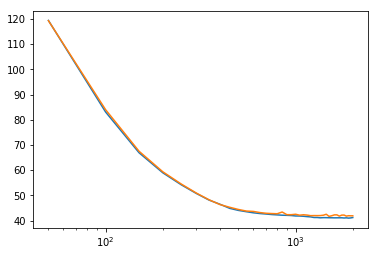

In [121]:
pd.Series(o[0.0].item()).plot(logx=True)
pd.Series(o[0.2].item()).plot(logx=True)
# pd.Series(o[0.4].item()).plot()
# pd.Series(o[0.6].item()).plot()
# pd.Series(o[0.8].item()).plot()
# pd.Series(o[1.0].item()).plot()
# pd.Series(o['reduced'].item()).plot()

In [90]:
pd.Series(o[p].item()).min(), 

(37.368244171142578,)

In [106]:
fold_num = 1
order ='fridge mw hvac dw dr'
app1, app2, app3,app4,app5 = order.split()
test_error = np.load("../code/baseline/test-error-{}-1-GRU-50-1-True-0.1-2000-{}-[\'{}\', \'{}\', \'{}\', \'{}\', \'{}\'].npy".format(fold_num, 0.0, app1,app2, app3,app4,app5))

In [107]:
pd.Series(test_error.item()[2000]).mean()

45.9204522079804

In [46]:
print("../code/baseline/learning_p/valid-losses-0-1-GRU-50-1-True-0.1-2000-{}-{}.npy".format(p, order))

../code/baseline/learning_p/valid-losses-0-1-GRU-50-1-True-0.1-2000-0.2-[_fridge_, _hvac_, _dr_, _dw_, _mw_].npy


In [148]:
import itertools
o = {}
for order in list(itertools.permutations(['hvac', 'fridge', 'dr', 'dw', 'mw'])):
    try:
        app1, app2, app3,app4,app5 = order
        o[order] = np.load("../code/baseline/rnn-tree-order-2/valid-error-0-1-GRU-50-1-True-0.1-2000-0.4-[\'{}\', \'{}\', \'{}\', \'{}\', \'{}\'].npy".format(app1,app2, app3,app4,app5)).item()[2000]
    except:
        continue

In [150]:
pd.DataFrame(o).mean().argmin()

/zf14/yj9xs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  """Entry point for launching an IPython kernel.


('dw', 'fridge', 'hvac', 'mw', 'dr')

In [151]:
pd.DataFrame(o).mean()[_150]

40.617905640722462